### Aprendizaje profundo / MLP con Early Stopping y Dropout (Core)
## MLP con Early Stopping y Dropout (Core 8)
### Descripción
En esta actividad, implementarás una red MLP más avanzada, utilizando técnicas como dropout y early stopping para evitar el sobreajuste. El dataset seleccionado es el «Heart Disease UCI» de Kaggle, donde se intentará predecir si un paciente tiene una enfermedad cardíaca o no basándose en varias características.
Enlace al dataset: https://www.kaggle.com/ronitf/heart-disease-uci

### Objetivo:
El objetivo de esta actividad es entrenar una red MLP utilizando dropout para regularizar la red y early stopping para detener el entrenamiento cuando el rendimiento en el conjunto de validación deje de mejorar. Al final, se comparará el rendimiento de este modelo con el de un MLP básico.

### Instrucciones:

1. Carga de datos:
  - Descarga el dataset «Heart Disease UCI» de Kaggle. Explora las características que están relacionadas con la edad, el sexo, la presión arterial y otras variables clínicas.
  - Verifica si hay valores nulos en el dataset y realiza el preprocesamiento necesario, como la imputación de valores faltantes y la normalización de las variables numéricas.

2. Exploración y preprocesamiento de datos:
  - Realiza una división del dataset en conjunto de entrenamiento y prueba. Asegúrate de que el dataset esté bien balanceado, verificando la distribución de la variable objetivo (enfermedad cardíaca sí/no).

3. Implementación de la MLP con Dropout:
  - Implementa una red MLP con dos capas ocultas utilizando Keras o cualquier biblioteca de deep learning.
  - Agrega capas de dropout después de cada capa oculta para reducir el riesgo de sobreajuste. Utiliza una tasa de dropout del 20-30%.
  - Implementa el early stopping para detener el entrenamiento cuando la precisión en el conjunto de validación deje de mejorar después de varias épocas (por ejemplo, paciencia de 5 épocas).

4. Entrenamiento del modelo:
  - Entrena el modelo con early stopping activado, utilizando el optimizador Adam y la función de pérdida binaria (binary_crossentropy). Entrena durante un máximo de 100 épocas.
  - Visualiza las curvas de aprendizaje para observar cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento, especialmente con early stopping activado.

5. Evaluación del modelo:
  - Evalúa el modelo en el conjunto de prueba y compara las métricas de rendimiento, como precisión, recall, F1-score y matriz de confusión.
  - Discute cómo el uso de dropout y early stopping ha afectado el rendimiento en comparación con un MLP básico sin estas técnicas.

***
### Desarrollo

### 1. Carga de datos

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
# Cargar el dataset
file_path = '../data/BreastCancer.csv'
data = pd.read_csv(file_path)
print("\nPrimeras filas del dataset:")
print(data.head())


Primeras filas del dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_

In [4]:
# Verificar valores nulos
print("\nValores nulos en cada columna:")
print(data.isnull().sum())

# Imputar valores faltantes únicamente en columnas numéricas
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Imputar valores faltantes en columnas categóricas con el valor más frecuente
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])


Valores nulos en cada columna:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal

In [5]:
# Descripción estadística general
print("\nResumen estadístico del dataset:")
print(data.describe())


Resumen estadístico del dataset:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std        

### 2. Exploración y preprocesamiento de datos

In [19]:
# Separar características y variable objetivo (simularemos la enfermedad cardíaca como 'diagnosis')
X = data.drop(['diagnosis'], axis=1)  # Características
y = data['diagnosis'].map({'M': 1, 'B': 0})  # Etiquetas binarias

In [20]:
# Normalización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [21]:
# Verificar balanceo de la variable objetivo
print("\nDistribución de la variable objetivo:")
print(y.value_counts())


Distribución de la variable objetivo:
diagnosis
0    357
1    212
Name: count, dtype: int64


In [32]:
# Balancear el dataset (si no está balanceado)
majority_class = data[y == 0]
minority_class = data[y == 1]

if len(minority_class) < len(majority_class):
    minority_class = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
    balanced_data = pd.concat([majority_class, minority_class])
    X = balanced_data.drop(['diagnosis'], axis=1)
    y = balanced_data['diagnosis']
    X_scaled = scaler.fit_transform(X)

c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [59]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [60]:
# Verificar los tipos de datos de X_train
print("Tipos de datos en X_train:")
print(X_train.dtype)  # Esto funciona si X_train es un DataFrame
print(type(X_train))   # Verifica si es un DataFrame, NumPy array, etc.

# Verificar los tipos de datos de y_train
print("\nTipo de datos en y_train:")
print(y_train.dtype)   # Funciona si es un array de NumPy
print(type(y_train))   # Verifica si es una Serie de pandas o NumPy array

y_train.head()

y_train = y_train.map({'M': 1, 'B': 0})  # Etiquetas binarias

# Verificar los tipos de datos de y_train
print("\nTipo de datos en y_train:")
print(y_train.dtype)   # Funciona si es un array de NumPy
print(type(y_train))   # Verifica si es una Serie de pandas o NumPy array


Tipos de datos en X_train:
float64
<class 'numpy.ndarray'>

Tipo de datos en y_train:
object
<class 'pandas.core.series.Series'>

Tipo de datos en y_train:
int64
<class 'pandas.core.series.Series'>


### 3. Implementación de la MLP con Dropout

In [61]:
# Crear el modelo MLP con Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta 1
    Dropout(0.3),
    Dense(32, activation='relu'),  # Capa oculta 2
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
# Configurar early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### 4. Entrenamiento del modelo

In [63]:
# Entrenamiento del modelo con early stopping
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4790 - loss: 0.6932 - val_accuracy: 0.4600 - val_loss: 0.6932
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4684 - loss: 0.6931 - val_accuracy: 0.4600 - val_loss: 0.6932
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4723 - loss: 0.6932 - val_accuracy: 0.4600 - val_loss: 0.6932
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4959 - loss: 0.6932 - val_accuracy: 0.4600 - val_loss: 0.6932
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5574 - loss: 0.6930 - val_accuracy: 0.4600 - val_loss: 0.6934
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4893 - loss: 0.6932 - val_accuracy: 0.4600 - val_loss: 0.6934


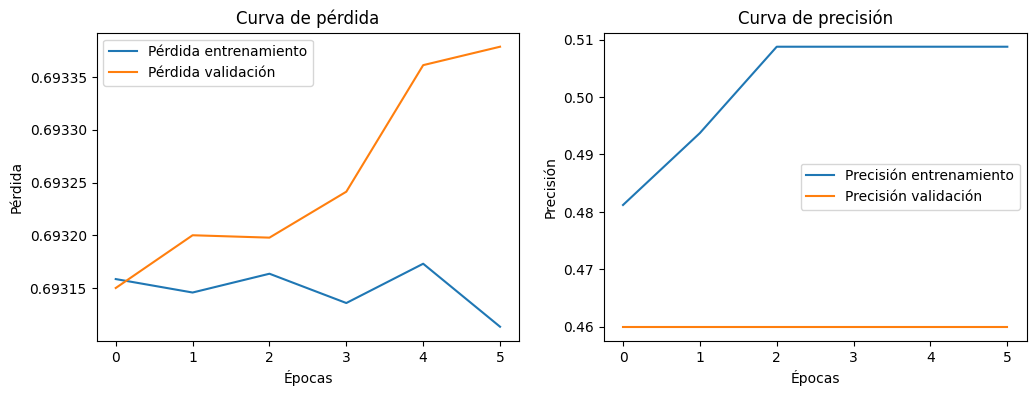

In [64]:
# Visualización de las curvas de aprendizaje
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Curva de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Curva de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

### 5. Evaluación del modelo

In [69]:
# Obtener las probabilidades predichas para la clase '1' (en clasificación binaria)
y_pred_prob = model.predict(X_test)[:, 0]  # Si es binaria, solo hay una salida de probabilidad

# Establecer umbral para la clasificación binaria (0.6 en este caso)
threshold = 0.6
y_pred = [1 if prob > threshold else 0 for prob in y_pred_prob]

# Verificar si hay valores NaN en las predicciones
if any(pd.isna(y_pred)):
    print("Hay valores NaN en las predicciones.")

# Convertir las predicciones binarias (0 y 1) a etiquetas 'B' y 'M'
y_pred_labels = ['B' if label == 0 else 'M' for label in y_pred]

# Imprimir la matriz de confusión
print(confusion_matrix(y_test, y_pred_labels))

# Imprimir el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_labels))

# Calcular y mostrar la precisión en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred_labels)
print(f"\nPrecisión en el conjunto de prueba: {test_accuracy:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[108   0]
 [107   0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           B       0.50      1.00      0.67       108
           M       0.00      0.00      0.00       107

    accuracy                           0.50       215
   macro avg       0.25      0.50      0.33       215
weighted avg       0.25      0.50      0.34       215


Precisión en el conjunto de prueba: 0.50


c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Discusión:
El uso de dropout y early stopping reduce el riesgo de sobreajuste y permite un mejor rendimiento en datos de prueba al detener el entrenamiento en el momento óptimo.